In [139]:
# Import the necessary Python libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os.path
import csv
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [140]:
DATA_DIR = "/Particle_Swarm/data"

In [180]:
Rep = 30
Guide_num_max = 4
Worker_numbers = [10, 50, 100, 250, 500, 1000, 2000, 5000]
workers_str = ['10', '50', '100', '250', '500', '1k', '2k', '5k']
GUIDE_START_ID = 9000
TIME_CONSTANT=10

In [142]:
print("EXPERIMENTAL DATA FILES STATS FOR Convergence experiment.")
total_num = 0
does_not_exsist = 0
for guide_num in range(1,Guide_num_max+1):
    for Worker_num_idx in range(0,len(Worker_numbers)):
        for rep in range(1,Rep+1):
            total_num = total_num +1
            if not os.path.exists(DATA_DIR+'/HC_'+str(guide_num)+'_'+str(Worker_numbers[Worker_num_idx])+'_'+str(rep)+'.csv'):
                print("EXP: guide num {} worker num {} rep {} does not exist".format(guide_num,Worker_numbers[Worker_num_idx] ,rep))
                print(DATA_DIR+'/HC_'+str(guide_num)+'_'+str(Worker_numbers[Worker_num_idx])+'_'+str(rep)+'.csv')
                does_not_exsist = does_not_exsist + 1
print(" Total exp stat: total num of exp {}, files not found {}".format(total_num, does_not_exsist))


EXPERIMENTAL DATA FILES STATS FOR Convergence experiment.
 Total exp stat: total num of exp 960, files not found 0


In [143]:
def get_names(guide_num, worker_num):
    name = ['time_step']
    for i in range(0,worker_num):
        name.append('id_'+str(i))
        name.append('vconf_'+str(i))
        name.append('rconf_'+str(i))
        name.append('expdone_'+str(i))
    for i in range(GUIDE_START_ID, GUIDE_START_ID + worker_num):
        name.append('id_'+str(i))
        name.append('vconf_'+str(i))
        name.append('rconf_'+str(i))
        name.append('expdone_'+str(i))
    return name

In [144]:
# Reads the data of a single experiment
def read_datafile(name, guide_num, worker_num):
    fname = DATA_DIR + "/" + name
    print(fname)
    if not os.path.exists(fname):
        print("File does not exsist "+fname)
        return pd.DataFrame()
    names = get_names(guide_num, worker_num)
    return pd.read_csv(fname, names=names, header=None, skiprows=0, engine='python')

In [145]:
# Makes a series of raw data out of a set of experiments #
# MAP_TYPE+'_'+MAPS[map_id]+'_'+str(map_size)+'_'+CONFS[conf_id]+'_'+str(rep)
def static_avg_time_make_series_data(guide_num,worker_num):
    # Create series to contain the result
    res = pd.Series()
    res.at[0] = guide_num
    res.at[1] = worker_num
    for i in range(1,Rep+1):
        fname='HC_'+str(guide_num)+'_'+str(worker_num)+'_'+str(i)+'.csv'
        c_df = read_datafile(fname, guide_num, worker_num)
        if not c_df.empty:
            res.at[i+2] = c_df.tail(1).iloc[0][0]
    return res
# Makes a complete table of raw data
def static_avg_time_make_table_data():
    ind=0
    df_list=[]
    # Store data here
    df = pd.DataFrame()
    # Fill in the data for urban, one series at a time
    EXP_IND=0
    for guide_num in range(1,Guide_num_max+1):
        for Worker_num_idx in range(0,len(Worker_numbers)):
            time=static_avg_time_make_series_data(guide_num, Worker_numbers[Worker_num_idx])
            df = df.append(time, ignore_index=True)
    # Return the dataframe
    df.set_index([0, 1], inplace=True)
    df.index.names = ["guide_num", "worker_num"]
    df.columns = range(1, Rep+1)
    df_list.append(df)
    
    return df_list

In [146]:
exp_time_data = static_avg_time_make_table_data()

/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_10_1.csv
/Particle_Swarm/data/HC_1_10_2.csv
/Particle_Swarm/data/HC_1_10_3.csv
/Particle_Swarm/data/HC_1_10_4.csv
/Particle_Swarm/data/HC_1_10_5.csv
/Particle_Swarm/data/HC_1_10_6.csv
/Particle_Swarm/data/HC_1_10_7.csv
/Particle_Swarm/data/HC_1_10_8.csv
/Particle_Swarm/data/HC_1_10_9.csv
/Particle_Swarm/data/HC_1_10_10.csv
/Particle_Swarm/data/HC_1_10_11.csv
/Particle_Swarm/data/HC_1_10_12.csv
/Particle_Swarm/data/HC_1_10_13.csv
/Particle_Swarm/data/HC_1_10_14.csv
/Particle_Swarm/data/HC_1_10_15.csv
/Particle_Swarm/data/HC_1_10_16.csv
/Particle_Swarm/data/HC_1_10_17.csv
/Particle_Swarm/data/HC_1_10_18.csv
/Particle_Swarm/data/HC_1_10_19.csv
/Particle_Swarm/data/HC_1_10_20.csv
/Particle_Swarm/data/HC_1_10_21.csv
/Particle_Swarm/data/HC_1_10_22.csv
/Particle_Swarm/data/HC_1_10_23.csv
/Particle_Swarm/data/HC_1_10_24.csv
/Particle_Swarm/data/HC_1_10_25.csv
/Particle_Swarm/data/HC_1_10_26.csv
/Particle_Swarm/data/HC_1_10_27.csv
/Particle_Swarm/data/HC_1_10_28.csv
/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_50_2.csv
/Particle_Swarm/data/HC_1_50_3.csv
/Particle_Swarm/data/HC_1_50_4.csv
/Particle_Swarm/data/HC_1_50_5.csv
/Particle_Swarm/data/HC_1_50_6.csv
/Particle_Swarm/data/HC_1_50_7.csv
/Particle_Swarm/data/HC_1_50_8.csv
/Particle_Swarm/data/HC_1_50_9.csv
/Particle_Swarm/data/HC_1_50_10.csv
/Particle_Swarm/data/HC_1_50_11.csv
/Particle_Swarm/data/HC_1_50_12.csv
/Particle_Swarm/data/HC_1_50_13.csv
/Particle_Swarm/data/HC_1_50_14.csv
/Particle_Swarm/data/HC_1_50_15.csv
/Particle_Swarm/data/HC_1_50_16.csv
/Particle_Swarm/data/HC_1_50_17.csv
/Particle_Swarm/data/HC_1_50_18.csv
/Particle_Swarm/data/HC_1_50_19.csv
/Particle_Swarm/data/HC_1_50_20.csv
/Particle_Swarm/data/HC_1_50_21.csv
/Particle_Swarm/data/HC_1_50_22.csv
/Particle_Swarm/data/HC_1_50_23.csv
/Particle_Swarm/data/HC_1_50_24.csv
/Particle_Swarm/data/HC_1_50_25.csv
/Particle_Swarm/data/HC_1_50_26.csv
/Particle_Swarm/data/HC_1_50_27.csv
/Particle_Swarm/data/HC_1_50_28.csv
/Particle_Swarm/data/HC_1_50_29.csv


/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_100_1.csv
/Particle_Swarm/data/HC_1_100_2.csv
/Particle_Swarm/data/HC_1_100_3.csv
/Particle_Swarm/data/HC_1_100_4.csv
/Particle_Swarm/data/HC_1_100_5.csv
/Particle_Swarm/data/HC_1_100_6.csv
/Particle_Swarm/data/HC_1_100_7.csv
/Particle_Swarm/data/HC_1_100_8.csv
/Particle_Swarm/data/HC_1_100_9.csv
/Particle_Swarm/data/HC_1_100_10.csv
/Particle_Swarm/data/HC_1_100_11.csv
/Particle_Swarm/data/HC_1_100_12.csv
/Particle_Swarm/data/HC_1_100_13.csv
/Particle_Swarm/data/HC_1_100_14.csv
/Particle_Swarm/data/HC_1_100_15.csv
/Particle_Swarm/data/HC_1_100_16.csv
/Particle_Swarm/data/HC_1_100_17.csv
/Particle_Swarm/data/HC_1_100_18.csv
/Particle_Swarm/data/HC_1_100_19.csv
/Particle_Swarm/data/HC_1_100_20.csv
/Particle_Swarm/data/HC_1_100_21.csv
/Particle_Swarm/data/HC_1_100_22.csv
/Particle_Swarm/data/HC_1_100_23.csv
/Particle_Swarm/data/HC_1_100_24.csv
/Particle_Swarm/data/HC_1_100_25.csv
/Particle_Swarm/data/HC_1_100_26.csv
/Particle_Swarm/data/HC_1_100_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_250_1.csv
/Particle_Swarm/data/HC_1_250_2.csv
/Particle_Swarm/data/HC_1_250_3.csv
/Particle_Swarm/data/HC_1_250_4.csv
/Particle_Swarm/data/HC_1_250_5.csv
/Particle_Swarm/data/HC_1_250_6.csv
/Particle_Swarm/data/HC_1_250_7.csv
/Particle_Swarm/data/HC_1_250_8.csv
/Particle_Swarm/data/HC_1_250_9.csv
/Particle_Swarm/data/HC_1_250_10.csv
/Particle_Swarm/data/HC_1_250_11.csv
/Particle_Swarm/data/HC_1_250_12.csv
/Particle_Swarm/data/HC_1_250_13.csv
/Particle_Swarm/data/HC_1_250_14.csv
/Particle_Swarm/data/HC_1_250_15.csv
/Particle_Swarm/data/HC_1_250_16.csv
/Particle_Swarm/data/HC_1_250_17.csv
/Particle_Swarm/data/HC_1_250_18.csv
/Particle_Swarm/data/HC_1_250_19.csv
/Particle_Swarm/data/HC_1_250_20.csv
/Particle_Swarm/data/HC_1_250_21.csv
/Particle_Swarm/data/HC_1_250_22.csv
/Particle_Swarm/data/HC_1_250_23.csv
/Particle_Swarm/data/HC_1_250_24.csv
/Particle_Swarm/data/HC_1_250_25.csv
/Particle_Swarm/data/HC_1_250_26.csv
/Particle_Swarm/data/HC_1_250_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_500_1.csv
/Particle_Swarm/data/HC_1_500_2.csv
/Particle_Swarm/data/HC_1_500_3.csv
/Particle_Swarm/data/HC_1_500_4.csv
/Particle_Swarm/data/HC_1_500_5.csv
/Particle_Swarm/data/HC_1_500_6.csv
/Particle_Swarm/data/HC_1_500_7.csv
/Particle_Swarm/data/HC_1_500_8.csv
/Particle_Swarm/data/HC_1_500_9.csv
/Particle_Swarm/data/HC_1_500_10.csv
/Particle_Swarm/data/HC_1_500_11.csv
/Particle_Swarm/data/HC_1_500_12.csv
/Particle_Swarm/data/HC_1_500_13.csv
/Particle_Swarm/data/HC_1_500_14.csv
/Particle_Swarm/data/HC_1_500_15.csv
/Particle_Swarm/data/HC_1_500_16.csv
/Particle_Swarm/data/HC_1_500_17.csv
/Particle_Swarm/data/HC_1_500_18.csv
/Particle_Swarm/data/HC_1_500_19.csv
/Particle_Swarm/data/HC_1_500_20.csv
/Particle_Swarm/data/HC_1_500_21.csv
/Particle_Swarm/data/HC_1_500_22.csv
/Particle_Swarm/data/HC_1_500_23.csv
/Particle_Swarm/data/HC_1_500_24.csv
/Particle_Swarm/data/HC_1_500_25.csv
/Particle_Swarm/data/HC_1_500_26.csv
/Particle_Swarm/data/HC_1_500_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_1000_1.csv
/Particle_Swarm/data/HC_1_1000_2.csv
/Particle_Swarm/data/HC_1_1000_3.csv
/Particle_Swarm/data/HC_1_1000_4.csv
/Particle_Swarm/data/HC_1_1000_5.csv
/Particle_Swarm/data/HC_1_1000_6.csv
/Particle_Swarm/data/HC_1_1000_7.csv
/Particle_Swarm/data/HC_1_1000_8.csv
/Particle_Swarm/data/HC_1_1000_9.csv
/Particle_Swarm/data/HC_1_1000_10.csv
/Particle_Swarm/data/HC_1_1000_11.csv
/Particle_Swarm/data/HC_1_1000_12.csv
/Particle_Swarm/data/HC_1_1000_13.csv
/Particle_Swarm/data/HC_1_1000_14.csv
/Particle_Swarm/data/HC_1_1000_15.csv
/Particle_Swarm/data/HC_1_1000_16.csv
/Particle_Swarm/data/HC_1_1000_17.csv
/Particle_Swarm/data/HC_1_1000_18.csv
/Particle_Swarm/data/HC_1_1000_19.csv
/Particle_Swarm/data/HC_1_1000_20.csv
/Particle_Swarm/data/HC_1_1000_21.csv
/Particle_Swarm/data/HC_1_1000_22.csv
/Particle_Swarm/data/HC_1_1000_23.csv
/Particle_Swarm/data/HC_1_1000_24.csv
/Particle_Swarm/data/HC_1_1000_25.csv
/Particle_Swarm/data/HC_1_1000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_2000_1.csv
/Particle_Swarm/data/HC_1_2000_2.csv
/Particle_Swarm/data/HC_1_2000_3.csv
/Particle_Swarm/data/HC_1_2000_4.csv
/Particle_Swarm/data/HC_1_2000_5.csv
/Particle_Swarm/data/HC_1_2000_6.csv
/Particle_Swarm/data/HC_1_2000_7.csv
/Particle_Swarm/data/HC_1_2000_8.csv
/Particle_Swarm/data/HC_1_2000_9.csv
/Particle_Swarm/data/HC_1_2000_10.csv
/Particle_Swarm/data/HC_1_2000_11.csv
/Particle_Swarm/data/HC_1_2000_12.csv
/Particle_Swarm/data/HC_1_2000_13.csv
/Particle_Swarm/data/HC_1_2000_14.csv
/Particle_Swarm/data/HC_1_2000_15.csv
/Particle_Swarm/data/HC_1_2000_16.csv
/Particle_Swarm/data/HC_1_2000_17.csv
/Particle_Swarm/data/HC_1_2000_18.csv
/Particle_Swarm/data/HC_1_2000_19.csv
/Particle_Swarm/data/HC_1_2000_20.csv
/Particle_Swarm/data/HC_1_2000_21.csv
/Particle_Swarm/data/HC_1_2000_22.csv
/Particle_Swarm/data/HC_1_2000_23.csv
/Particle_Swarm/data/HC_1_2000_24.csv
/Particle_Swarm/data/HC_1_2000_25.csv
/Particle_Swarm/data/HC_1_2000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_1_5000_1.csv
/Particle_Swarm/data/HC_1_5000_2.csv
/Particle_Swarm/data/HC_1_5000_3.csv
/Particle_Swarm/data/HC_1_5000_4.csv
/Particle_Swarm/data/HC_1_5000_5.csv
/Particle_Swarm/data/HC_1_5000_6.csv
/Particle_Swarm/data/HC_1_5000_7.csv
/Particle_Swarm/data/HC_1_5000_8.csv
/Particle_Swarm/data/HC_1_5000_9.csv
/Particle_Swarm/data/HC_1_5000_10.csv
/Particle_Swarm/data/HC_1_5000_11.csv
/Particle_Swarm/data/HC_1_5000_12.csv
/Particle_Swarm/data/HC_1_5000_13.csv
/Particle_Swarm/data/HC_1_5000_14.csv
/Particle_Swarm/data/HC_1_5000_15.csv
/Particle_Swarm/data/HC_1_5000_16.csv
/Particle_Swarm/data/HC_1_5000_17.csv
/Particle_Swarm/data/HC_1_5000_18.csv
/Particle_Swarm/data/HC_1_5000_19.csv
/Particle_Swarm/data/HC_1_5000_20.csv
/Particle_Swarm/data/HC_1_5000_21.csv
/Particle_Swarm/data/HC_1_5000_22.csv
/Particle_Swarm/data/HC_1_5000_23.csv
/Particle_Swarm/data/HC_1_5000_24.csv
/Particle_Swarm/data/HC_1_5000_25.csv
/Particle_Swarm/data/HC_1_5000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_10_1.csv
/Particle_Swarm/data/HC_2_10_2.csv
/Particle_Swarm/data/HC_2_10_3.csv
/Particle_Swarm/data/HC_2_10_4.csv
/Particle_Swarm/data/HC_2_10_5.csv
/Particle_Swarm/data/HC_2_10_6.csv
/Particle_Swarm/data/HC_2_10_7.csv
/Particle_Swarm/data/HC_2_10_8.csv
/Particle_Swarm/data/HC_2_10_9.csv
/Particle_Swarm/data/HC_2_10_10.csv
/Particle_Swarm/data/HC_2_10_11.csv
/Particle_Swarm/data/HC_2_10_12.csv
/Particle_Swarm/data/HC_2_10_13.csv
/Particle_Swarm/data/HC_2_10_14.csv
/Particle_Swarm/data/HC_2_10_15.csv
/Particle_Swarm/data/HC_2_10_16.csv
/Particle_Swarm/data/HC_2_10_17.csv
/Particle_Swarm/data/HC_2_10_18.csv
/Particle_Swarm/data/HC_2_10_19.csv
/Particle_Swarm/data/HC_2_10_20.csv
/Particle_Swarm/data/HC_2_10_21.csv
/Particle_Swarm/data/HC_2_10_22.csv
/Particle_Swarm/data/HC_2_10_23.csv
/Particle_Swarm/data/HC_2_10_24.csv
/Particle_Swarm/data/HC_2_10_25.csv
/Particle_Swarm/data/HC_2_10_26.csv
/Particle_Swarm/data/HC_2_10_27.csv
/Particle_Swarm/data/HC_2_10_28.csv
/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_50_1.csv
/Particle_Swarm/data/HC_2_50_2.csv
/Particle_Swarm/data/HC_2_50_3.csv
/Particle_Swarm/data/HC_2_50_4.csv
/Particle_Swarm/data/HC_2_50_5.csv
/Particle_Swarm/data/HC_2_50_6.csv
/Particle_Swarm/data/HC_2_50_7.csv
/Particle_Swarm/data/HC_2_50_8.csv
/Particle_Swarm/data/HC_2_50_9.csv
/Particle_Swarm/data/HC_2_50_10.csv
/Particle_Swarm/data/HC_2_50_11.csv
/Particle_Swarm/data/HC_2_50_12.csv
/Particle_Swarm/data/HC_2_50_13.csv
/Particle_Swarm/data/HC_2_50_14.csv
/Particle_Swarm/data/HC_2_50_15.csv
/Particle_Swarm/data/HC_2_50_16.csv
/Particle_Swarm/data/HC_2_50_17.csv
/Particle_Swarm/data/HC_2_50_18.csv
/Particle_Swarm/data/HC_2_50_19.csv
/Particle_Swarm/data/HC_2_50_20.csv
/Particle_Swarm/data/HC_2_50_21.csv
/Particle_Swarm/data/HC_2_50_22.csv
/Particle_Swarm/data/HC_2_50_23.csv
/Particle_Swarm/data/HC_2_50_24.csv
/Particle_Swarm/data/HC_2_50_25.csv
/Particle_Swarm/data/HC_2_50_26.csv
/Particle_Swarm/data/HC_2_50_27.csv
/Particle_Swarm/data/HC_2_50_28.csv
/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_100_1.csv
/Particle_Swarm/data/HC_2_100_2.csv
/Particle_Swarm/data/HC_2_100_3.csv
/Particle_Swarm/data/HC_2_100_4.csv
/Particle_Swarm/data/HC_2_100_5.csv
/Particle_Swarm/data/HC_2_100_6.csv
/Particle_Swarm/data/HC_2_100_7.csv
/Particle_Swarm/data/HC_2_100_8.csv
/Particle_Swarm/data/HC_2_100_9.csv
/Particle_Swarm/data/HC_2_100_10.csv
/Particle_Swarm/data/HC_2_100_11.csv
/Particle_Swarm/data/HC_2_100_12.csv
/Particle_Swarm/data/HC_2_100_13.csv
/Particle_Swarm/data/HC_2_100_14.csv
/Particle_Swarm/data/HC_2_100_15.csv
/Particle_Swarm/data/HC_2_100_16.csv
/Particle_Swarm/data/HC_2_100_17.csv
/Particle_Swarm/data/HC_2_100_18.csv
/Particle_Swarm/data/HC_2_100_19.csv
/Particle_Swarm/data/HC_2_100_20.csv
/Particle_Swarm/data/HC_2_100_21.csv
/Particle_Swarm/data/HC_2_100_22.csv
/Particle_Swarm/data/HC_2_100_23.csv
/Particle_Swarm/data/HC_2_100_24.csv
/Particle_Swarm/data/HC_2_100_25.csv
/Particle_Swarm/data/HC_2_100_26.csv
/Particle_Swarm/data/HC_2_100_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_250_1.csv
/Particle_Swarm/data/HC_2_250_2.csv
/Particle_Swarm/data/HC_2_250_3.csv
/Particle_Swarm/data/HC_2_250_4.csv
/Particle_Swarm/data/HC_2_250_5.csv
/Particle_Swarm/data/HC_2_250_6.csv
/Particle_Swarm/data/HC_2_250_7.csv
/Particle_Swarm/data/HC_2_250_8.csv
/Particle_Swarm/data/HC_2_250_9.csv
/Particle_Swarm/data/HC_2_250_10.csv
/Particle_Swarm/data/HC_2_250_11.csv
/Particle_Swarm/data/HC_2_250_12.csv
/Particle_Swarm/data/HC_2_250_13.csv
/Particle_Swarm/data/HC_2_250_14.csv
/Particle_Swarm/data/HC_2_250_15.csv
/Particle_Swarm/data/HC_2_250_16.csv
/Particle_Swarm/data/HC_2_250_17.csv
/Particle_Swarm/data/HC_2_250_18.csv
/Particle_Swarm/data/HC_2_250_19.csv
/Particle_Swarm/data/HC_2_250_20.csv
/Particle_Swarm/data/HC_2_250_21.csv
/Particle_Swarm/data/HC_2_250_22.csv
/Particle_Swarm/data/HC_2_250_23.csv
/Particle_Swarm/data/HC_2_250_24.csv
/Particle_Swarm/data/HC_2_250_25.csv
/Particle_Swarm/data/HC_2_250_26.csv
/Particle_Swarm/data/HC_2_250_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_500_1.csv
/Particle_Swarm/data/HC_2_500_2.csv
/Particle_Swarm/data/HC_2_500_3.csv
/Particle_Swarm/data/HC_2_500_4.csv
/Particle_Swarm/data/HC_2_500_5.csv
/Particle_Swarm/data/HC_2_500_6.csv
/Particle_Swarm/data/HC_2_500_7.csv
/Particle_Swarm/data/HC_2_500_8.csv
/Particle_Swarm/data/HC_2_500_9.csv
/Particle_Swarm/data/HC_2_500_10.csv
/Particle_Swarm/data/HC_2_500_11.csv
/Particle_Swarm/data/HC_2_500_12.csv
/Particle_Swarm/data/HC_2_500_13.csv
/Particle_Swarm/data/HC_2_500_14.csv
/Particle_Swarm/data/HC_2_500_15.csv
/Particle_Swarm/data/HC_2_500_16.csv
/Particle_Swarm/data/HC_2_500_17.csv
/Particle_Swarm/data/HC_2_500_18.csv
/Particle_Swarm/data/HC_2_500_19.csv
/Particle_Swarm/data/HC_2_500_20.csv
/Particle_Swarm/data/HC_2_500_21.csv
/Particle_Swarm/data/HC_2_500_22.csv
/Particle_Swarm/data/HC_2_500_23.csv
/Particle_Swarm/data/HC_2_500_24.csv
/Particle_Swarm/data/HC_2_500_25.csv
/Particle_Swarm/data/HC_2_500_26.csv
/Particle_Swarm/data/HC_2_500_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_1000_1.csv
/Particle_Swarm/data/HC_2_1000_2.csv
/Particle_Swarm/data/HC_2_1000_3.csv
/Particle_Swarm/data/HC_2_1000_4.csv
/Particle_Swarm/data/HC_2_1000_5.csv
/Particle_Swarm/data/HC_2_1000_6.csv
/Particle_Swarm/data/HC_2_1000_7.csv
/Particle_Swarm/data/HC_2_1000_8.csv
/Particle_Swarm/data/HC_2_1000_9.csv
/Particle_Swarm/data/HC_2_1000_10.csv
/Particle_Swarm/data/HC_2_1000_11.csv
/Particle_Swarm/data/HC_2_1000_12.csv
/Particle_Swarm/data/HC_2_1000_13.csv
/Particle_Swarm/data/HC_2_1000_14.csv
/Particle_Swarm/data/HC_2_1000_15.csv
/Particle_Swarm/data/HC_2_1000_16.csv
/Particle_Swarm/data/HC_2_1000_17.csv
/Particle_Swarm/data/HC_2_1000_18.csv
/Particle_Swarm/data/HC_2_1000_19.csv
/Particle_Swarm/data/HC_2_1000_20.csv
/Particle_Swarm/data/HC_2_1000_21.csv
/Particle_Swarm/data/HC_2_1000_22.csv
/Particle_Swarm/data/HC_2_1000_23.csv
/Particle_Swarm/data/HC_2_1000_24.csv
/Particle_Swarm/data/HC_2_1000_25.csv
/Particle_Swarm/data/HC_2_1000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_2000_1.csv
/Particle_Swarm/data/HC_2_2000_2.csv
/Particle_Swarm/data/HC_2_2000_3.csv
/Particle_Swarm/data/HC_2_2000_4.csv
/Particle_Swarm/data/HC_2_2000_5.csv
/Particle_Swarm/data/HC_2_2000_6.csv
/Particle_Swarm/data/HC_2_2000_7.csv
/Particle_Swarm/data/HC_2_2000_8.csv
/Particle_Swarm/data/HC_2_2000_9.csv
/Particle_Swarm/data/HC_2_2000_10.csv
/Particle_Swarm/data/HC_2_2000_11.csv
/Particle_Swarm/data/HC_2_2000_12.csv
/Particle_Swarm/data/HC_2_2000_13.csv
/Particle_Swarm/data/HC_2_2000_14.csv
/Particle_Swarm/data/HC_2_2000_15.csv
/Particle_Swarm/data/HC_2_2000_16.csv
/Particle_Swarm/data/HC_2_2000_17.csv
/Particle_Swarm/data/HC_2_2000_18.csv
/Particle_Swarm/data/HC_2_2000_19.csv
/Particle_Swarm/data/HC_2_2000_20.csv
/Particle_Swarm/data/HC_2_2000_21.csv
/Particle_Swarm/data/HC_2_2000_22.csv
/Particle_Swarm/data/HC_2_2000_23.csv
/Particle_Swarm/data/HC_2_2000_24.csv
/Particle_Swarm/data/HC_2_2000_25.csv
/Particle_Swarm/data/HC_2_2000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_2_5000_1.csv
/Particle_Swarm/data/HC_2_5000_2.csv
/Particle_Swarm/data/HC_2_5000_3.csv
/Particle_Swarm/data/HC_2_5000_4.csv
/Particle_Swarm/data/HC_2_5000_5.csv
/Particle_Swarm/data/HC_2_5000_6.csv
/Particle_Swarm/data/HC_2_5000_7.csv
/Particle_Swarm/data/HC_2_5000_8.csv
/Particle_Swarm/data/HC_2_5000_9.csv
/Particle_Swarm/data/HC_2_5000_10.csv
/Particle_Swarm/data/HC_2_5000_11.csv
/Particle_Swarm/data/HC_2_5000_12.csv
/Particle_Swarm/data/HC_2_5000_13.csv
/Particle_Swarm/data/HC_2_5000_14.csv
/Particle_Swarm/data/HC_2_5000_15.csv
/Particle_Swarm/data/HC_2_5000_16.csv
/Particle_Swarm/data/HC_2_5000_17.csv
/Particle_Swarm/data/HC_2_5000_18.csv
/Particle_Swarm/data/HC_2_5000_19.csv
/Particle_Swarm/data/HC_2_5000_20.csv
/Particle_Swarm/data/HC_2_5000_21.csv
/Particle_Swarm/data/HC_2_5000_22.csv
/Particle_Swarm/data/HC_2_5000_23.csv
/Particle_Swarm/data/HC_2_5000_24.csv
/Particle_Swarm/data/HC_2_5000_25.csv
/Particle_Swarm/data/HC_2_5000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_10_1.csv
/Particle_Swarm/data/HC_3_10_2.csv
/Particle_Swarm/data/HC_3_10_3.csv
/Particle_Swarm/data/HC_3_10_4.csv
/Particle_Swarm/data/HC_3_10_5.csv
/Particle_Swarm/data/HC_3_10_6.csv
/Particle_Swarm/data/HC_3_10_7.csv
/Particle_Swarm/data/HC_3_10_8.csv
/Particle_Swarm/data/HC_3_10_9.csv
/Particle_Swarm/data/HC_3_10_10.csv
/Particle_Swarm/data/HC_3_10_11.csv
/Particle_Swarm/data/HC_3_10_12.csv
/Particle_Swarm/data/HC_3_10_13.csv
/Particle_Swarm/data/HC_3_10_14.csv
/Particle_Swarm/data/HC_3_10_15.csv
/Particle_Swarm/data/HC_3_10_16.csv
/Particle_Swarm/data/HC_3_10_17.csv
/Particle_Swarm/data/HC_3_10_18.csv
/Particle_Swarm/data/HC_3_10_19.csv
/Particle_Swarm/data/HC_3_10_20.csv
/Particle_Swarm/data/HC_3_10_21.csv
/Particle_Swarm/data/HC_3_10_22.csv
/Particle_Swarm/data/HC_3_10_23.csv
/Particle_Swarm/data/HC_3_10_24.csv
/Particle_Swarm/data/HC_3_10_25.csv
/Particle_Swarm/data/HC_3_10_26.csv
/Particle_Swarm/data/HC_3_10_27.csv
/Particle_Swarm/data/HC_3_10_28.csv
/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_50_1.csv
/Particle_Swarm/data/HC_3_50_2.csv
/Particle_Swarm/data/HC_3_50_3.csv
/Particle_Swarm/data/HC_3_50_4.csv
/Particle_Swarm/data/HC_3_50_5.csv
/Particle_Swarm/data/HC_3_50_6.csv
/Particle_Swarm/data/HC_3_50_7.csv
/Particle_Swarm/data/HC_3_50_8.csv
/Particle_Swarm/data/HC_3_50_9.csv
/Particle_Swarm/data/HC_3_50_10.csv
/Particle_Swarm/data/HC_3_50_11.csv
/Particle_Swarm/data/HC_3_50_12.csv
/Particle_Swarm/data/HC_3_50_13.csv
/Particle_Swarm/data/HC_3_50_14.csv
/Particle_Swarm/data/HC_3_50_15.csv
/Particle_Swarm/data/HC_3_50_16.csv
/Particle_Swarm/data/HC_3_50_17.csv
/Particle_Swarm/data/HC_3_50_18.csv
/Particle_Swarm/data/HC_3_50_19.csv
/Particle_Swarm/data/HC_3_50_20.csv
/Particle_Swarm/data/HC_3_50_21.csv
/Particle_Swarm/data/HC_3_50_22.csv
/Particle_Swarm/data/HC_3_50_23.csv
/Particle_Swarm/data/HC_3_50_24.csv
/Particle_Swarm/data/HC_3_50_25.csv
/Particle_Swarm/data/HC_3_50_26.csv
/Particle_Swarm/data/HC_3_50_27.csv
/Particle_Swarm/data/HC_3_50_28.csv
/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_100_1.csv
/Particle_Swarm/data/HC_3_100_2.csv
/Particle_Swarm/data/HC_3_100_3.csv
/Particle_Swarm/data/HC_3_100_4.csv
/Particle_Swarm/data/HC_3_100_5.csv
/Particle_Swarm/data/HC_3_100_6.csv
/Particle_Swarm/data/HC_3_100_7.csv
/Particle_Swarm/data/HC_3_100_8.csv
/Particle_Swarm/data/HC_3_100_9.csv
/Particle_Swarm/data/HC_3_100_10.csv
/Particle_Swarm/data/HC_3_100_11.csv
/Particle_Swarm/data/HC_3_100_12.csv
/Particle_Swarm/data/HC_3_100_13.csv
/Particle_Swarm/data/HC_3_100_14.csv
/Particle_Swarm/data/HC_3_100_15.csv
/Particle_Swarm/data/HC_3_100_16.csv
/Particle_Swarm/data/HC_3_100_17.csv
/Particle_Swarm/data/HC_3_100_18.csv
/Particle_Swarm/data/HC_3_100_19.csv
/Particle_Swarm/data/HC_3_100_20.csv
/Particle_Swarm/data/HC_3_100_21.csv
/Particle_Swarm/data/HC_3_100_22.csv
/Particle_Swarm/data/HC_3_100_23.csv
/Particle_Swarm/data/HC_3_100_24.csv
/Particle_Swarm/data/HC_3_100_25.csv
/Particle_Swarm/data/HC_3_100_26.csv
/Particle_Swarm/data/HC_3_100_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_250_1.csv
/Particle_Swarm/data/HC_3_250_2.csv
/Particle_Swarm/data/HC_3_250_3.csv
/Particle_Swarm/data/HC_3_250_4.csv
/Particle_Swarm/data/HC_3_250_5.csv
/Particle_Swarm/data/HC_3_250_6.csv
/Particle_Swarm/data/HC_3_250_7.csv
/Particle_Swarm/data/HC_3_250_8.csv
/Particle_Swarm/data/HC_3_250_9.csv
/Particle_Swarm/data/HC_3_250_10.csv
/Particle_Swarm/data/HC_3_250_11.csv
/Particle_Swarm/data/HC_3_250_12.csv
/Particle_Swarm/data/HC_3_250_13.csv
/Particle_Swarm/data/HC_3_250_14.csv
/Particle_Swarm/data/HC_3_250_15.csv
/Particle_Swarm/data/HC_3_250_16.csv
/Particle_Swarm/data/HC_3_250_17.csv
/Particle_Swarm/data/HC_3_250_18.csv
/Particle_Swarm/data/HC_3_250_19.csv
/Particle_Swarm/data/HC_3_250_20.csv
/Particle_Swarm/data/HC_3_250_21.csv
/Particle_Swarm/data/HC_3_250_22.csv
/Particle_Swarm/data/HC_3_250_23.csv
/Particle_Swarm/data/HC_3_250_24.csv
/Particle_Swarm/data/HC_3_250_25.csv
/Particle_Swarm/data/HC_3_250_26.csv
/Particle_Swarm/data/HC_3_250_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_500_1.csv
/Particle_Swarm/data/HC_3_500_2.csv
/Particle_Swarm/data/HC_3_500_3.csv
/Particle_Swarm/data/HC_3_500_4.csv
/Particle_Swarm/data/HC_3_500_5.csv
/Particle_Swarm/data/HC_3_500_6.csv
/Particle_Swarm/data/HC_3_500_7.csv
/Particle_Swarm/data/HC_3_500_8.csv
/Particle_Swarm/data/HC_3_500_9.csv
/Particle_Swarm/data/HC_3_500_10.csv
/Particle_Swarm/data/HC_3_500_11.csv
/Particle_Swarm/data/HC_3_500_12.csv
/Particle_Swarm/data/HC_3_500_13.csv
/Particle_Swarm/data/HC_3_500_14.csv
/Particle_Swarm/data/HC_3_500_15.csv
/Particle_Swarm/data/HC_3_500_16.csv
/Particle_Swarm/data/HC_3_500_17.csv
/Particle_Swarm/data/HC_3_500_18.csv
/Particle_Swarm/data/HC_3_500_19.csv
/Particle_Swarm/data/HC_3_500_20.csv
/Particle_Swarm/data/HC_3_500_21.csv
/Particle_Swarm/data/HC_3_500_22.csv
/Particle_Swarm/data/HC_3_500_23.csv
/Particle_Swarm/data/HC_3_500_24.csv
/Particle_Swarm/data/HC_3_500_25.csv
/Particle_Swarm/data/HC_3_500_26.csv
/Particle_Swarm/data/HC_3_500_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_1000_1.csv
/Particle_Swarm/data/HC_3_1000_2.csv
/Particle_Swarm/data/HC_3_1000_3.csv
/Particle_Swarm/data/HC_3_1000_4.csv
/Particle_Swarm/data/HC_3_1000_5.csv
/Particle_Swarm/data/HC_3_1000_6.csv
/Particle_Swarm/data/HC_3_1000_7.csv
/Particle_Swarm/data/HC_3_1000_8.csv
/Particle_Swarm/data/HC_3_1000_9.csv
/Particle_Swarm/data/HC_3_1000_10.csv
/Particle_Swarm/data/HC_3_1000_11.csv
/Particle_Swarm/data/HC_3_1000_12.csv
/Particle_Swarm/data/HC_3_1000_13.csv
/Particle_Swarm/data/HC_3_1000_14.csv
/Particle_Swarm/data/HC_3_1000_15.csv
/Particle_Swarm/data/HC_3_1000_16.csv
/Particle_Swarm/data/HC_3_1000_17.csv
/Particle_Swarm/data/HC_3_1000_18.csv
/Particle_Swarm/data/HC_3_1000_19.csv
/Particle_Swarm/data/HC_3_1000_20.csv
/Particle_Swarm/data/HC_3_1000_21.csv
/Particle_Swarm/data/HC_3_1000_22.csv
/Particle_Swarm/data/HC_3_1000_23.csv
/Particle_Swarm/data/HC_3_1000_24.csv
/Particle_Swarm/data/HC_3_1000_25.csv
/Particle_Swarm/data/HC_3_1000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_2000_1.csv
/Particle_Swarm/data/HC_3_2000_2.csv
/Particle_Swarm/data/HC_3_2000_3.csv
/Particle_Swarm/data/HC_3_2000_4.csv
/Particle_Swarm/data/HC_3_2000_5.csv
/Particle_Swarm/data/HC_3_2000_6.csv
/Particle_Swarm/data/HC_3_2000_7.csv
/Particle_Swarm/data/HC_3_2000_8.csv
/Particle_Swarm/data/HC_3_2000_9.csv
/Particle_Swarm/data/HC_3_2000_10.csv
/Particle_Swarm/data/HC_3_2000_11.csv
/Particle_Swarm/data/HC_3_2000_12.csv
/Particle_Swarm/data/HC_3_2000_13.csv
/Particle_Swarm/data/HC_3_2000_14.csv
/Particle_Swarm/data/HC_3_2000_15.csv
/Particle_Swarm/data/HC_3_2000_16.csv
/Particle_Swarm/data/HC_3_2000_17.csv
/Particle_Swarm/data/HC_3_2000_18.csv
/Particle_Swarm/data/HC_3_2000_19.csv
/Particle_Swarm/data/HC_3_2000_20.csv
/Particle_Swarm/data/HC_3_2000_21.csv
/Particle_Swarm/data/HC_3_2000_22.csv
/Particle_Swarm/data/HC_3_2000_23.csv
/Particle_Swarm/data/HC_3_2000_24.csv
/Particle_Swarm/data/HC_3_2000_25.csv
/Particle_Swarm/data/HC_3_2000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_3_5000_1.csv
/Particle_Swarm/data/HC_3_5000_2.csv
/Particle_Swarm/data/HC_3_5000_3.csv
/Particle_Swarm/data/HC_3_5000_4.csv
/Particle_Swarm/data/HC_3_5000_5.csv
/Particle_Swarm/data/HC_3_5000_6.csv
/Particle_Swarm/data/HC_3_5000_7.csv
/Particle_Swarm/data/HC_3_5000_8.csv
/Particle_Swarm/data/HC_3_5000_9.csv
/Particle_Swarm/data/HC_3_5000_10.csv
/Particle_Swarm/data/HC_3_5000_11.csv
/Particle_Swarm/data/HC_3_5000_12.csv
/Particle_Swarm/data/HC_3_5000_13.csv
/Particle_Swarm/data/HC_3_5000_14.csv
/Particle_Swarm/data/HC_3_5000_15.csv
/Particle_Swarm/data/HC_3_5000_16.csv
/Particle_Swarm/data/HC_3_5000_17.csv
/Particle_Swarm/data/HC_3_5000_18.csv
/Particle_Swarm/data/HC_3_5000_19.csv
/Particle_Swarm/data/HC_3_5000_20.csv
/Particle_Swarm/data/HC_3_5000_21.csv
/Particle_Swarm/data/HC_3_5000_22.csv
/Particle_Swarm/data/HC_3_5000_23.csv
/Particle_Swarm/data/HC_3_5000_24.csv
/Particle_Swarm/data/HC_3_5000_25.csv
/Particle_Swarm/data/HC_3_5000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_10_1.csv
/Particle_Swarm/data/HC_4_10_2.csv
/Particle_Swarm/data/HC_4_10_3.csv
/Particle_Swarm/data/HC_4_10_4.csv
/Particle_Swarm/data/HC_4_10_5.csv
/Particle_Swarm/data/HC_4_10_6.csv
/Particle_Swarm/data/HC_4_10_7.csv
/Particle_Swarm/data/HC_4_10_8.csv
/Particle_Swarm/data/HC_4_10_9.csv
/Particle_Swarm/data/HC_4_10_10.csv
/Particle_Swarm/data/HC_4_10_11.csv
/Particle_Swarm/data/HC_4_10_12.csv
/Particle_Swarm/data/HC_4_10_13.csv
/Particle_Swarm/data/HC_4_10_14.csv
/Particle_Swarm/data/HC_4_10_15.csv
/Particle_Swarm/data/HC_4_10_16.csv
/Particle_Swarm/data/HC_4_10_17.csv
/Particle_Swarm/data/HC_4_10_18.csv
/Particle_Swarm/data/HC_4_10_19.csv
/Particle_Swarm/data/HC_4_10_20.csv
/Particle_Swarm/data/HC_4_10_21.csv
/Particle_Swarm/data/HC_4_10_22.csv
/Particle_Swarm/data/HC_4_10_23.csv
/Particle_Swarm/data/HC_4_10_24.csv
/Particle_Swarm/data/HC_4_10_25.csv
/Particle_Swarm/data/HC_4_10_26.csv
/Particle_Swarm/data/HC_4_10_27.csv
/Particle_Swarm/data/HC_4_10_28.csv
/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_50_2.csv
/Particle_Swarm/data/HC_4_50_3.csv
/Particle_Swarm/data/HC_4_50_4.csv
/Particle_Swarm/data/HC_4_50_5.csv
/Particle_Swarm/data/HC_4_50_6.csv
/Particle_Swarm/data/HC_4_50_7.csv
/Particle_Swarm/data/HC_4_50_8.csv
/Particle_Swarm/data/HC_4_50_9.csv
/Particle_Swarm/data/HC_4_50_10.csv
/Particle_Swarm/data/HC_4_50_11.csv
/Particle_Swarm/data/HC_4_50_12.csv
/Particle_Swarm/data/HC_4_50_13.csv
/Particle_Swarm/data/HC_4_50_14.csv
/Particle_Swarm/data/HC_4_50_15.csv
/Particle_Swarm/data/HC_4_50_16.csv
/Particle_Swarm/data/HC_4_50_17.csv
/Particle_Swarm/data/HC_4_50_18.csv
/Particle_Swarm/data/HC_4_50_19.csv
/Particle_Swarm/data/HC_4_50_20.csv
/Particle_Swarm/data/HC_4_50_21.csv
/Particle_Swarm/data/HC_4_50_22.csv
/Particle_Swarm/data/HC_4_50_23.csv
/Particle_Swarm/data/HC_4_50_24.csv
/Particle_Swarm/data/HC_4_50_25.csv
/Particle_Swarm/data/HC_4_50_26.csv
/Particle_Swarm/data/HC_4_50_27.csv
/Particle_Swarm/data/HC_4_50_28.csv
/Particle_Swarm/data/HC_4_50_29.csv


/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_100_1.csv
/Particle_Swarm/data/HC_4_100_2.csv
/Particle_Swarm/data/HC_4_100_3.csv
/Particle_Swarm/data/HC_4_100_4.csv
/Particle_Swarm/data/HC_4_100_5.csv
/Particle_Swarm/data/HC_4_100_6.csv
/Particle_Swarm/data/HC_4_100_7.csv
/Particle_Swarm/data/HC_4_100_8.csv
/Particle_Swarm/data/HC_4_100_9.csv
/Particle_Swarm/data/HC_4_100_10.csv
/Particle_Swarm/data/HC_4_100_11.csv
/Particle_Swarm/data/HC_4_100_12.csv
/Particle_Swarm/data/HC_4_100_13.csv
/Particle_Swarm/data/HC_4_100_14.csv
/Particle_Swarm/data/HC_4_100_15.csv
/Particle_Swarm/data/HC_4_100_16.csv
/Particle_Swarm/data/HC_4_100_17.csv
/Particle_Swarm/data/HC_4_100_18.csv
/Particle_Swarm/data/HC_4_100_19.csv
/Particle_Swarm/data/HC_4_100_20.csv
/Particle_Swarm/data/HC_4_100_21.csv
/Particle_Swarm/data/HC_4_100_22.csv
/Particle_Swarm/data/HC_4_100_23.csv
/Particle_Swarm/data/HC_4_100_24.csv
/Particle_Swarm/data/HC_4_100_25.csv
/Particle_Swarm/data/HC_4_100_26.csv
/Particle_Swarm/data/HC_4_100_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_250_1.csv
/Particle_Swarm/data/HC_4_250_2.csv
/Particle_Swarm/data/HC_4_250_3.csv
/Particle_Swarm/data/HC_4_250_4.csv
/Particle_Swarm/data/HC_4_250_5.csv
/Particle_Swarm/data/HC_4_250_6.csv
/Particle_Swarm/data/HC_4_250_7.csv
/Particle_Swarm/data/HC_4_250_8.csv
/Particle_Swarm/data/HC_4_250_9.csv
/Particle_Swarm/data/HC_4_250_10.csv
/Particle_Swarm/data/HC_4_250_11.csv
/Particle_Swarm/data/HC_4_250_12.csv
/Particle_Swarm/data/HC_4_250_13.csv
/Particle_Swarm/data/HC_4_250_14.csv
/Particle_Swarm/data/HC_4_250_15.csv
/Particle_Swarm/data/HC_4_250_16.csv
/Particle_Swarm/data/HC_4_250_17.csv
/Particle_Swarm/data/HC_4_250_18.csv
/Particle_Swarm/data/HC_4_250_19.csv
/Particle_Swarm/data/HC_4_250_20.csv
/Particle_Swarm/data/HC_4_250_21.csv
/Particle_Swarm/data/HC_4_250_22.csv
/Particle_Swarm/data/HC_4_250_23.csv
/Particle_Swarm/data/HC_4_250_24.csv
/Particle_Swarm/data/HC_4_250_25.csv
/Particle_Swarm/data/HC_4_250_26.csv
/Particle_Swarm/data/HC_4_250_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_500_1.csv
/Particle_Swarm/data/HC_4_500_2.csv
/Particle_Swarm/data/HC_4_500_3.csv
/Particle_Swarm/data/HC_4_500_4.csv
/Particle_Swarm/data/HC_4_500_5.csv
/Particle_Swarm/data/HC_4_500_6.csv
/Particle_Swarm/data/HC_4_500_7.csv
/Particle_Swarm/data/HC_4_500_8.csv
/Particle_Swarm/data/HC_4_500_9.csv
/Particle_Swarm/data/HC_4_500_10.csv
/Particle_Swarm/data/HC_4_500_11.csv
/Particle_Swarm/data/HC_4_500_12.csv
/Particle_Swarm/data/HC_4_500_13.csv
/Particle_Swarm/data/HC_4_500_14.csv
/Particle_Swarm/data/HC_4_500_15.csv
/Particle_Swarm/data/HC_4_500_16.csv
/Particle_Swarm/data/HC_4_500_17.csv
/Particle_Swarm/data/HC_4_500_18.csv
/Particle_Swarm/data/HC_4_500_19.csv
/Particle_Swarm/data/HC_4_500_20.csv
/Particle_Swarm/data/HC_4_500_21.csv
/Particle_Swarm/data/HC_4_500_22.csv
/Particle_Swarm/data/HC_4_500_23.csv
/Particle_Swarm/data/HC_4_500_24.csv
/Particle_Swarm/data/HC_4_500_25.csv
/Particle_Swarm/data/HC_4_500_26.csv
/Particle_Swarm/data/HC_4_500_27.csv
/Particle_

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_1000_1.csv
/Particle_Swarm/data/HC_4_1000_2.csv
/Particle_Swarm/data/HC_4_1000_3.csv
/Particle_Swarm/data/HC_4_1000_4.csv
/Particle_Swarm/data/HC_4_1000_5.csv
/Particle_Swarm/data/HC_4_1000_6.csv
/Particle_Swarm/data/HC_4_1000_7.csv
/Particle_Swarm/data/HC_4_1000_8.csv
/Particle_Swarm/data/HC_4_1000_9.csv
/Particle_Swarm/data/HC_4_1000_10.csv
/Particle_Swarm/data/HC_4_1000_11.csv
/Particle_Swarm/data/HC_4_1000_12.csv
/Particle_Swarm/data/HC_4_1000_13.csv
/Particle_Swarm/data/HC_4_1000_14.csv
/Particle_Swarm/data/HC_4_1000_15.csv
/Particle_Swarm/data/HC_4_1000_16.csv
/Particle_Swarm/data/HC_4_1000_17.csv
/Particle_Swarm/data/HC_4_1000_18.csv
/Particle_Swarm/data/HC_4_1000_19.csv
/Particle_Swarm/data/HC_4_1000_20.csv
/Particle_Swarm/data/HC_4_1000_21.csv
/Particle_Swarm/data/HC_4_1000_22.csv
/Particle_Swarm/data/HC_4_1000_23.csv
/Particle_Swarm/data/HC_4_1000_24.csv
/Particle_Swarm/data/HC_4_1000_25.csv
/Particle_Swarm/data/HC_4_1000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_2000_1.csv
/Particle_Swarm/data/HC_4_2000_2.csv
/Particle_Swarm/data/HC_4_2000_3.csv
/Particle_Swarm/data/HC_4_2000_4.csv
/Particle_Swarm/data/HC_4_2000_5.csv
/Particle_Swarm/data/HC_4_2000_6.csv
/Particle_Swarm/data/HC_4_2000_7.csv
/Particle_Swarm/data/HC_4_2000_8.csv
/Particle_Swarm/data/HC_4_2000_9.csv
/Particle_Swarm/data/HC_4_2000_10.csv
/Particle_Swarm/data/HC_4_2000_11.csv
/Particle_Swarm/data/HC_4_2000_12.csv
/Particle_Swarm/data/HC_4_2000_13.csv
/Particle_Swarm/data/HC_4_2000_14.csv
/Particle_Swarm/data/HC_4_2000_15.csv
/Particle_Swarm/data/HC_4_2000_16.csv
/Particle_Swarm/data/HC_4_2000_17.csv
/Particle_Swarm/data/HC_4_2000_18.csv
/Particle_Swarm/data/HC_4_2000_19.csv
/Particle_Swarm/data/HC_4_2000_20.csv
/Particle_Swarm/data/HC_4_2000_21.csv
/Particle_Swarm/data/HC_4_2000_22.csv
/Particle_Swarm/data/HC_4_2000_23.csv
/Particle_Swarm/data/HC_4_2000_24.csv
/Particle_Swarm/data/HC_4_2000_25.csv
/Particle_Swarm/data/HC_4_2000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)
/tmp/ipykernel_441345/3518535638.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series()


/Particle_Swarm/data/HC_4_5000_1.csv
/Particle_Swarm/data/HC_4_5000_2.csv
/Particle_Swarm/data/HC_4_5000_3.csv
/Particle_Swarm/data/HC_4_5000_4.csv
/Particle_Swarm/data/HC_4_5000_5.csv
/Particle_Swarm/data/HC_4_5000_6.csv
/Particle_Swarm/data/HC_4_5000_7.csv
/Particle_Swarm/data/HC_4_5000_8.csv
/Particle_Swarm/data/HC_4_5000_9.csv
/Particle_Swarm/data/HC_4_5000_10.csv
/Particle_Swarm/data/HC_4_5000_11.csv
/Particle_Swarm/data/HC_4_5000_12.csv
/Particle_Swarm/data/HC_4_5000_13.csv
/Particle_Swarm/data/HC_4_5000_14.csv
/Particle_Swarm/data/HC_4_5000_15.csv
/Particle_Swarm/data/HC_4_5000_16.csv
/Particle_Swarm/data/HC_4_5000_17.csv
/Particle_Swarm/data/HC_4_5000_18.csv
/Particle_Swarm/data/HC_4_5000_19.csv
/Particle_Swarm/data/HC_4_5000_20.csv
/Particle_Swarm/data/HC_4_5000_21.csv
/Particle_Swarm/data/HC_4_5000_22.csv
/Particle_Swarm/data/HC_4_5000_23.csv
/Particle_Swarm/data/HC_4_5000_24.csv
/Particle_Swarm/data/HC_4_5000_25.csv
/Particle_Swarm/data/HC_4_5000_26.csv
/Particle_Swarm/data/

/tmp/ipykernel_441345/3518535638.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(time, ignore_index=True)


In [149]:
pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
a =pd.DataFrame([{"partition":i, "account_list":[f"id{j}" for j in range(500)]} for i in range(2)])

exp_time_data[0].stack().groupby(level=[1,0]).describe().unstack()



/tmp/ipykernel_441345/3050270809.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


count                           mean                            \
guide_num    1.0   2.0   3.0   4.0          1.0          2.0          3.0   
worker_num                                                                  
10.0        30.0  30.0  30.0  30.0  1802.800000  1802.000000  1802.000000   
50.0        30.0  30.0  30.0  30.0  1804.666667  1803.200000  1803.100000   
100.0       30.0  30.0  30.0  30.0  1806.033333  1804.066667  1804.066667   
250.0       30.0  30.0  30.0  30.0  1808.633333  1806.000000  1805.900000   
500.0       30.0  30.0  30.0  30.0  1811.733333  1808.000000  1807.733333   
1000.0      30.0  30.0  30.0  30.0  1815.966667  1810.633333  1810.433333   
2000.0      30.0  30.0  30.0  30.0  1821.800000  1814.200000  1814.066667   
5000.0      30.0  30.0  30.0  30.0  1833.533333  1821.866667  1821.666667   

                              std                                   min  \
guide_num           4.0       1.0       2.0       3.0       4.0     1.0   
worker_num                                                                
10.0        1802.000000  0.406838  0.000000  0.000000  0.000000  1802.0   
50.0        1802.966667  0.479463  0.406838  0.305129  0.182574  1804.0   
100.0       1803.333333  0.182574  0.253708  0.253708  0.479463  1806.0   
250.0       1804.900000  0.490133  0.000000  0.305129  0.305129  1808.0   
500.0       1806.100000  0.520830  0.262613  0.449776  0.305129  1811.0   
1000.0      1808.033333  0.319842  0.490133  0.504007  0.182574  1815.0   
2000.0      1811.000000  0.550861  0.406838  0.253708  0.000000  1821.0   
5000.0      1816.300000  0.507416  0.345746  0.479463  0.466092  1833.0   

                                        25%                              50%  \
guide_num      2.0     3.0     4.0      1.0     2.0      3.0     4.0     1.0   
worker_num                                                                     
10.0        1802.0  1802.0  1802.0  1803.00  1802.0  1802.00  1802.0  1803.0   
50.0        1803.0  1803.0  1802.0  1804.00  1803.0  1803.00  1803.0  1805.0   
100.0       1804.0  1804.0  1803.0  1806.00  1804.0  1804.00  1803.0  1806.0   
250.0       1806.0  1805.0  1804.0  1808.00  1806.0  1806.00  1805.0  1809.0   
500.0       1807.0  1807.0  1806.0  1811.00  1808.0  1807.25  1806.0  1812.0   
1000.0      1810.0  1810.0  1808.0  1816.00  1810.0  1810.00  1808.0  1816.0   
2000.0      1814.0  1814.0  1811.0  1821.25  1814.0  1814.00  1811.0  1822.0   
5000.0      1821.0  1821.0  1816.0  1833.00  1822.0  1821.00  1816.0  1834.0   

                                       75%                             max  \
guide_num      2.0     3.0     4.0     1.0     2.0     3.0     4.0     1.0   
worker_num                                                                   
10.0        1802.0  1802.0  1802.0  1803.0  1802.0  1802.0  1802.0  1803.0   
50.0        1803.0  1803.0  1803.0  1805.0  1803.0  1803.0  1803.0  1805.0   
100.0       1804.0  1804.0  1803.0  1806.0  1804.0  1804.0  1804.0  1807.0   
250.0       1806.0  1806.0  1805.0  1809.0  1806.0  1806.0  1805.0  1809.0   
500.0       1808.0  1808.0  1806.0  1812.0  1808.0  1808.0  1806.0  1813.0   
1000.0      1811.0  1810.0  1808.0  1816.0  1811.0  1811.0  1808.0  1817.0   
2000.0      1814.0  1814.0  1811.0  1822.0  1814.0  1814.0  1811.0  1823.0   
5000.0      1822.0  1822.0  1816.0  1834.0  1822.0  1822.0  1817.0  1834.0   

                                    
guide_num      2.0     3.0     4.0  
worker_num                          
10.0        1802.0  1802.0  1802.0  
50.0        1804.0  1804.0  1803.0  
100.0       1805.0  1805.0  1804.0  
250.0       1806.0  1806.0  1805.0  
500.0       1809.0  1808.0  1807.0  
1000.0      1811.0  1811.0  1809.0  
2000.0      1815.0  1815.0  1811.0  
5000.0      1822.0  1822.0  1817.0

In [181]:
exp_time_data[0].stack().groupby(level=[1,0]).describe().unstack()['mean'][1.0].tolist()

[1802.8,
 1804.6666666666667,
 1806.0333333333333,
 1808.6333333333334,
 1811.7333333333333,
 1815.9666666666667,
 1821.8,
 1833.5333333333333]

In [182]:
dat = ((exp_time_data[0]- 1800)/TIME_CONSTANT).stack().groupby(level=[1,0]).apply(lambda x: x.values.tolist()).tolist()

In [190]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

([<matplotlib.axis.XTick at 0x7ff94db2c1f0>,
 <a list of 8 Text xticklabel objects>)

(0, 3.5)

Text(39.472222222222214, 0.5, 'Time (S)')

Text(0.5, 24.722222222222214, 'Workers')

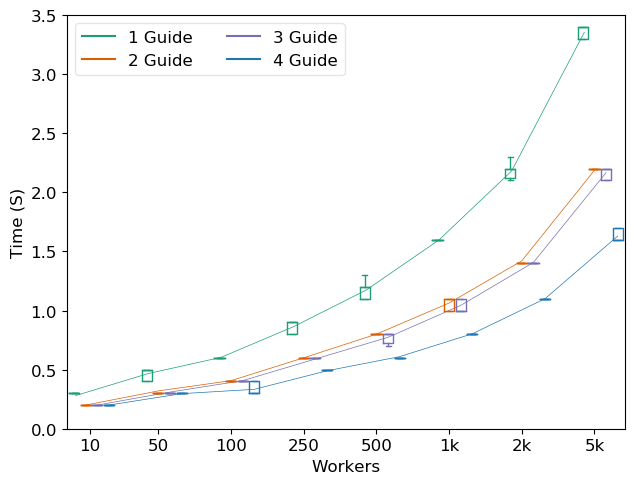

In [200]:
# Create figure and axes
fig = plt.figure(figsize=(6.5,5))
text_size = 12
plt.rc('xtick', labelsize=text_size) 
plt.rc('ytick', labelsize=text_size) 
# Plot axes
ax = fig.add_subplot(111)

conf_1 = []
conf_2 = []
conf_3 = []
conf_4 = []

i = 0
while( i < len(dat)):
    conf_1.append((dat[i]))
    conf_2.append((dat[i+1]))
    conf_3.append((dat[i+2]))
    conf_4.append((dat[i+3]))
    i = i+4

for i in range(1,Guide_num_max+1):
    y_lst=((exp_time_data[0]-1800)/TIME_CONSTANT).stack().groupby(level=[1,0]).describe().unstack()['mean'][i].tolist()
    
    x_lst= np.array([])
    if i == 1:
        x_lst = np.array(range(len(conf_1)))*5.0-1.5
        plt.plot(x_lst, y_lst,color='#1b9e77',linewidth=0.5)
        
    elif i == 2:
        x_lst = np.array(range(len(conf_1)))*5.0-0.8
        plt.plot(x_lst, y_lst,color='#d95f02',linewidth=0.5)
        
    elif i == 3:
        x_lst = np.array(range(len(conf_1)))*5.0
        plt.plot(x_lst, y_lst,color='#7570b3',linewidth=0.5)
    elif i == 4:
        x_lst = np.array(range(len(conf_1)))*5.0+0.8
        plt.plot(x_lst, y_lst,color='#1f78b4',linewidth=0.5)
        

lin_1 = plt.boxplot(conf_1, positions=np.array(range(len(conf_1)))*5.0-1.6, sym='', widths=0.7)
lin_2 = plt.boxplot(conf_2, positions=np.array(range(len(conf_1)))*5.0-0.8, sym='', widths=0.7)
lin_3 = plt.boxplot(conf_3, positions=np.array(range(len(conf_1)))*5.0, sym='', widths=0.7)
lin_4 = plt.boxplot(conf_4, positions=np.array(range(len(conf_1)))*5.0+0.8, sym='', widths=0.7)
# lin_5 = plt.boxplot(conf_5, positions=np.array(xrange(len(conf_1)))*5.0+1.6, sym='', widths=0.7)


set_box_color(lin_1, '#1b9e77') # colors are from http://colorbrewer2.org/
set_box_color(lin_2, '#d95f02')
set_box_color(lin_3, '#7570b3')
set_box_color(lin_4, '#1f78b4')
# set_box_color(lin_5, '#d877c4')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#1b9e77', label='1 Guide')
plt.plot([], c='#d95f02', label='2 Guide')
plt.plot([], c='#7570b3', label='3 Guide')
plt.plot([], c='#1f78b4', label='4 Guide')
# plt.plot([], c='#d877c4', label='10 Guide')

ax.legend(loc=2,ncol=2,framealpha=0.5,fontsize=text_size)
plt.xticks([-0.5,4.2,9.2,14.21,19.2,24.2,29.2,34.2], workers_str)
# plt.xlim(-2.6,32.6)
plt.ylim(0, 3.5)
plt.tight_layout(pad=2)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time (S)",fontsize=text_size)
ax.set_xlabel("Workers",fontsize=text_size)
# plt.show()
plt.savefig("/home/vivek/Vivek/vivek_papers/2023/MRS/figures/particle_convergence_time.pdf", dpi=600, format="pdf", transparent=False)